<h2>Importing the libraries</h2>

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path='/content/dataset.csv't
calories=pd.read_csv(path)
calories

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,0,68,174.562739,73.181027,1.618588,105,40.8,231.0
1,1,14861698,1,20,174.173175,74.458074,-0.184393,94,40.3,66.0
2,2,11179863,0,69,174.562739,74.458074,-1.266182,88,38.7,26.0
3,3,16180408,1,34,174.423704,74.458074,-0.304592,100,40.5,71.0
4,4,17771927,1,27,154.000000,76.178569,-0.665188,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...,...
14995,14995,15644082,1,20,193.000000,86.000000,-0.544989,92,40.4,45.0
14996,14996,17212577,1,27,165.000000,65.000000,-1.145983,85,39.2,23.0
14997,14997,17271188,1,43,159.000000,58.000000,0.056005,90,40.1,75.0
14998,14998,18643037,0,78,193.000000,97.000000,-1.626778,84,38.3,11.0


In [ ]:

combined_data=calories

In [ ]:
#checking the number of rows & columns
combined_data.shape

(15000, 10)

In [ ]:
#getting the information about the data
#most importantly to know about any missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15000 non-null  int64  
 1   User_ID     15000 non-null  int64  
 2   Gender      15000 non-null  int64  
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  int64  
 8   Body_Temp   15000 non-null  float64
 9   Calories    15000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.1 MB


In [ ]:
#checking the missing values
combined_data.isnull().sum()

Unnamed: 0    0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<h2>Analysing the data</h2>

In [ ]:
#To get stastical measures about the data
combined_data.describe()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.497736e+07,0.503533,42.789800,174.418581,74.889723,-5.885662e-17,95.518533,40.025453,89.539533
std,4330.271354,2.872851e+06,0.500004,16.980264,14.538709,15.231519,1.000033e+00,9.583328,0.779230,62.456978
min,0.000000,1.000116e+07,0.000000,20.000000,0.000000,0.000000,-1.746977e+00,67.000000,37.100000,1.000000
25%,3749.750000,1.247419e+07,0.000000,28.000000,164.000000,63.000000,-9.055854e-01,88.000000,39.600000,35.000000
50%,7499.500000,1.499728e+07,1.000000,39.000000,175.000000,74.000000,5.600461e-02,96.000000,40.200000,79.000000
75%,11249.250000,1.744928e+07,1.000000,56.000000,185.000000,87.000000,8.973959e-01,103.000000,40.600000,138.000000
max,14999.000000,1.999965e+07,1.000000,79.000000,222.000000,132.000000,1.738787e+00,128.000000,41.500000,314.000000


<h2>Conversion of text data to numerical values</h2>

In [ ]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,0,68,174.562739,73.181027,1.618588,105,40.8,231.0
1,1,14861698,1,20,174.173175,74.458074,-0.184393,94,40.3,66.0
2,2,11179863,0,69,174.562739,74.458074,-1.266182,88,38.7,26.0
3,3,16180408,1,34,174.423704,74.458074,-0.304592,100,40.5,71.0
4,4,17771927,1,27,154.000000,76.178569,-0.665188,81,39.8,35.0


<h2>Visualization of data</h2>

<Axes: xlabel='Age', ylabel='Density'>

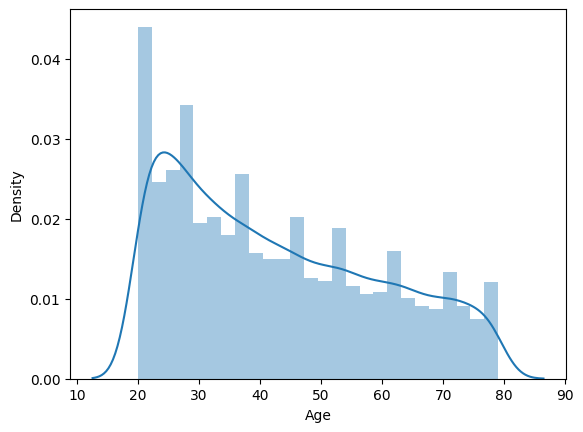

In [ ]:
#inorder to find the distribution of age column
sns.distplot(combined_data['Age'])

<Axes: xlabel='Height', ylabel='Density'>

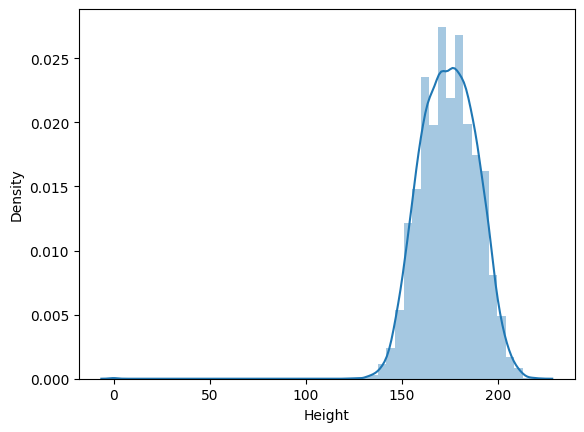

In [ ]:
#inorder to find the distribution of height column
sns.distplot(combined_data['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

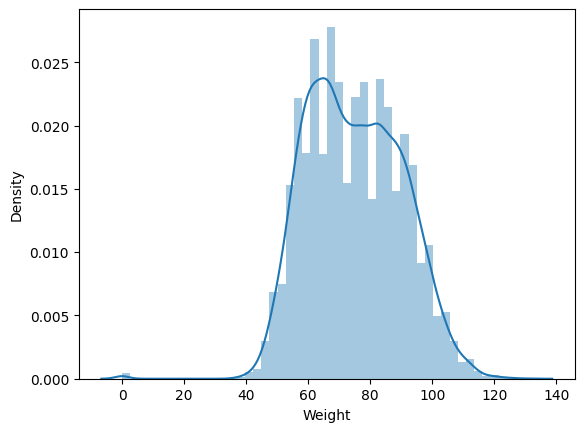

In [ ]:
#inorder to find the distribution of weight column
sns.distplot(combined_data['Weight'])

<Axes: xlabel='Heart_Rate', ylabel='Density'>

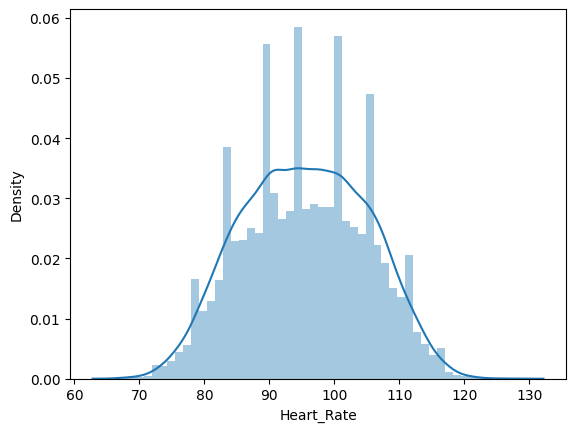

In [ ]:
sns.distplot(combined_data['Heart_Rate'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

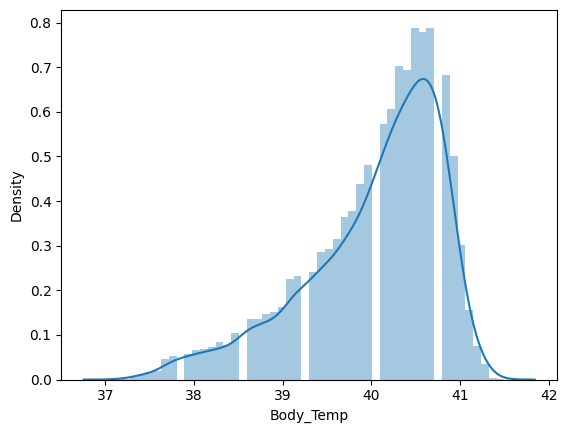

In [ ]:
sns.distplot(combined_data['Body_Temp'])

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'Body_Temp'}>],
       [<Axes: title={'center': 'Calories'}>, <Axes: >, <Axes: >]],
      dtype=object)

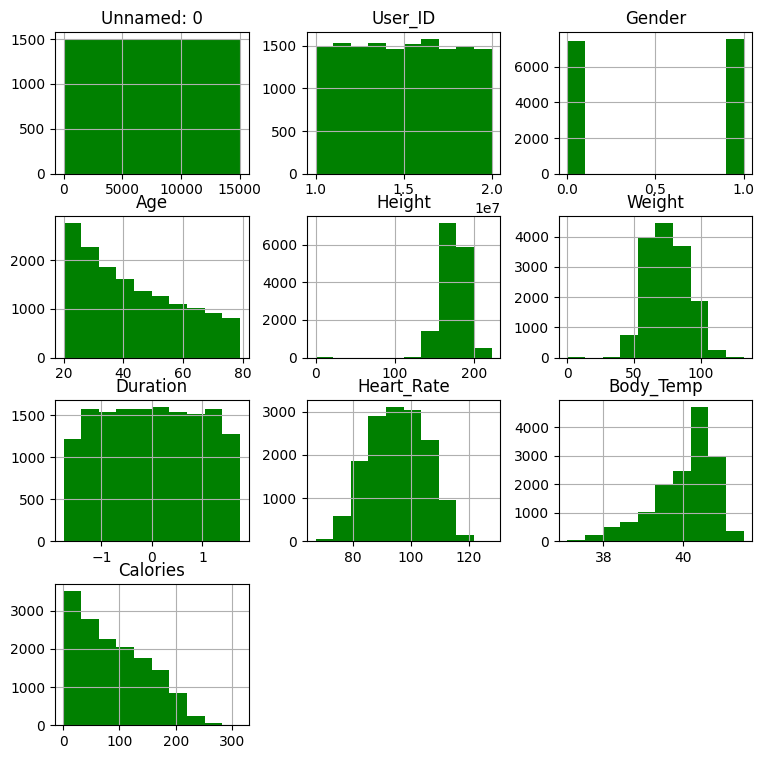

In [ ]:
#Histogram
from matplotlib import pyplot
combined_data.hist(color = "green", figsize = (9,9))

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Calories', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Calories'>,
        <Axes: xlabel='Calories', ylabel='Calories'>]], dtype=object)

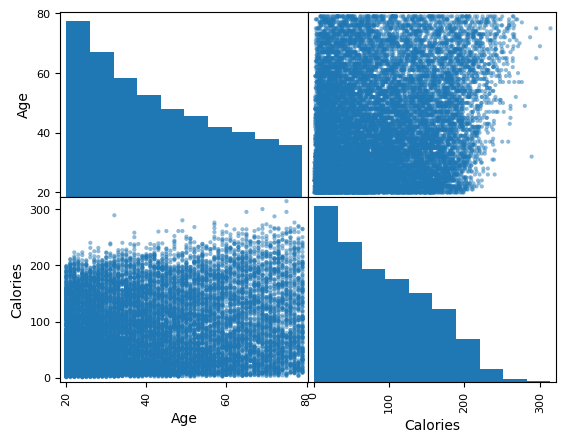

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(combined_data[['Age','Calories']])

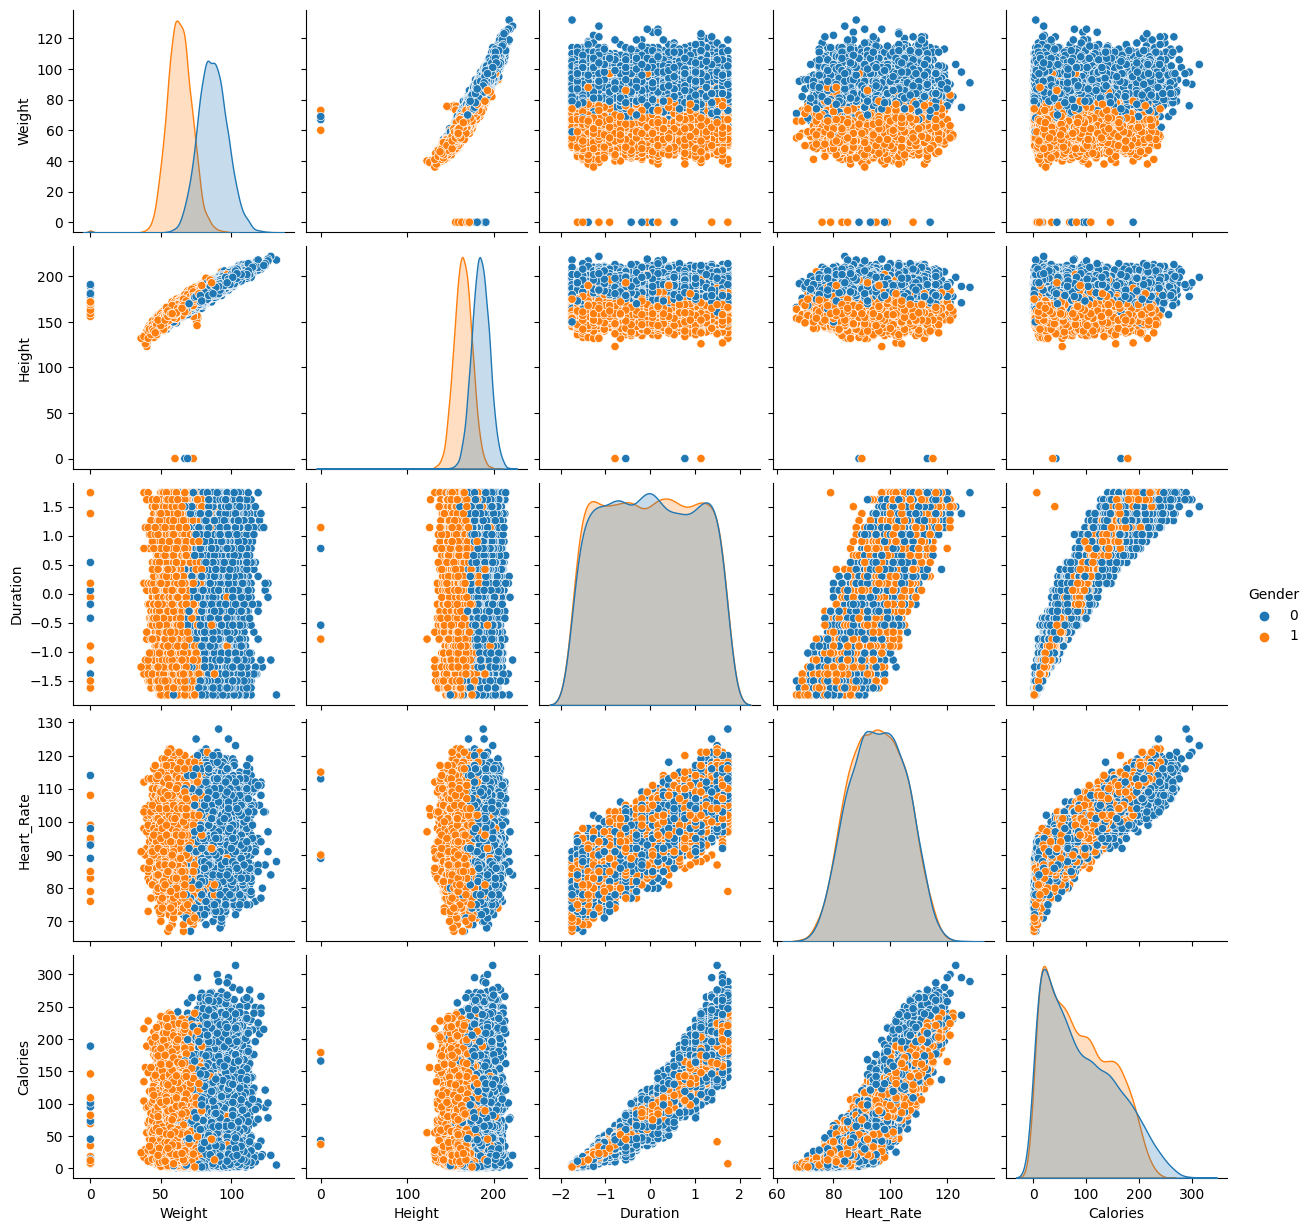

In [ ]:
#pair plot
sns.pairplot(combined_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

<h2>To find the correlation in the data</h2>

In [ ]:
correlation = combined_data.corr()

<Axes: >

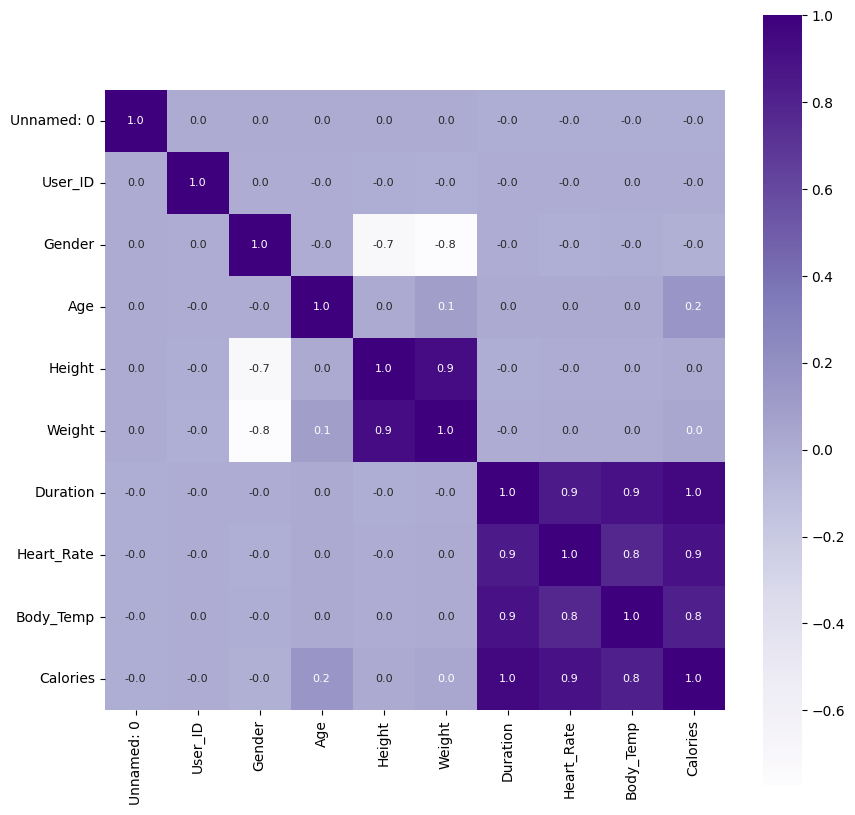

In [ ]:
#Construction of heat map for the understanding of correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

<h2>Seperation of features and target</h2>

In [ ]:
X=combined_data.drop(['User_ID','Calories'],axis=1)
Y=combined_data['Calories']

In [ ]:
X

,Unnamed: 0,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,0,68,174.562739,73.181027,1.618588,105,40.8
1,1,1,20,174.173175,74.458074,-0.184393,94,40.3
2,2,0,69,174.562739,74.458074,-1.266182,88,38.7
3,3,1,34,174.423704,74.458074,-0.304592,100,40.5
4,4,1,27,154.000000,76.178569,-0.665188,81,39.8
...,...,...,...,...,...,...,...,...
14995,14995,1,20,193.000000,86.000000,-0.544989,92,40.4
14996,14996,1,27,165.000000,65.000000,-1.145983,85,39.2
14997,14997,1,43,159.000000,58.000000,0.056005,90,40.1
14998,14998,0,78,193.000000,97.000000,-1.626778,84,38.3


In [ ]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

<H2>Split the data into training and test data</h2>

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


In [ ]:
print(X_train)

       Unnamed: 0  Gender  Age  Height  Weight  Duration  Heart_Rate  \
1154         1154       1   38   169.0     0.0 -1.506579          85   
9804         9804       0   30   194.0    96.0 -0.785387          91   
7919         7919       1   78   182.0    79.0 -1.025784          84   
4854         4854       0   50   171.0    77.0  1.618588         111   
5947         5947       1   32   172.0    66.0  1.618588         105   
...           ...     ...  ...     ...     ...       ...         ...   
11798       11798       1   49   178.0    71.0 -0.424790          98   
13896       13896       1   67   159.0    58.0  0.897396         101   
6637         6637       1   25   167.0    64.0  0.536800         100   
2575         2575       1   36   167.0    64.0  1.498390         108   
7336         7336       0   30   187.0    88.0 -0.665188          94   

       Body_Temp  
1154        38.5  
9804        39.6  
7919        39.4  
4854        40.8  
5947        40.8  
...          ...  
11

In [ ]:
print(X_test)

       Unnamed: 0  Gender  Age  Height  Weight  Duration  Heart_Rate  \
7592         7592       1   41   172.0    74.0  1.017595          98   
3551         3551       0   70   189.0    96.0  1.017595         113   
9698         9698       1   53   173.0    68.0 -1.025784          96   
3759         3759       0   36   191.0    96.0 -1.626778          82   
2353         2353       1   46   169.0    68.0  0.536800         111   
...           ...     ...  ...     ...     ...       ...         ...   
8859         8859       1   20   161.0    60.0  1.618588         107   
2886         2886       1   40   152.0    49.0 -0.544989          87   
14357       14357       1   57   160.0    62.0  0.897396         103   
9430         9430       1   58   171.0    67.0 -1.145983          82   
11870       11870       1   62   175.0    70.0  0.176203          94   

       Body_Temp  
7592        40.8  
3551        40.9  
9698        39.3  
3759        38.4  
2353        40.6  
...          ...  
88

In [ ]:
print(Y_train)

1154      12.0
9804      37.0
7919      31.0
4854     222.0
5947     174.0
         ...  
11798     66.0
13896    145.0
6637     108.0
2575     180.0
7336      44.0
Name: Calories, Length: 12000, dtype: float64


In [ ]:
print(Y_test)

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64


<h2>Model implementation and Prediction</h2>

<h3>Using Linear Regression</h3>

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)
calories_burnt_prediction1 = model1.predict(X_test)
print(calories_burnt_prediction1)

[137.00609993 182.15487919  50.63609802 ... 157.05836831  16.84104761
 100.5149975 ]


In [ ]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(Y_test, calories_burnt_prediction1)
print(error1)

134.54012024586768


<h3>Using XGBregressor</h3>

In [ ]:
model2 = XGBRegressor()
model2.fit(X_train,Y_train)
calories_burnt_prediction2 = model2.predict(X_test)

In [ ]:
error2 = mean_squared_error(Y_test, calories_burnt_prediction2)
error2

7.151762305442324

<h3>Using KNN</h3>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=13)
model3.fit(X_train,Y_train)
calories_burnt_prediction3 = model3.predict(X_test)
calories_burnt_prediction3

array([ 79.61538462, 110.38461538,  80.46153846, ..., 115.46153846,
        57.07692308, 101.30769231])

In [ ]:
error3 = mean_squared_error(Y_test, calories_burnt_prediction3)
error3

2639.9630710059173

<h3>KNN for different values of K</h3>

<BarContainer object of 7 artists>

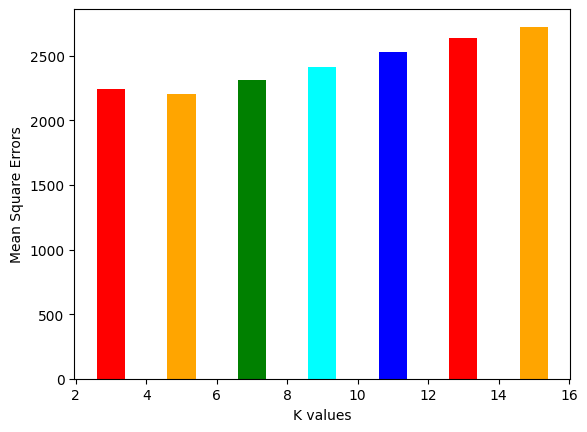

In [ ]:
k_values = []
K_MSE = []
for k in range(3 , 16 , 2):
    k_values.append(k)
    model3 = KNeighborsRegressor(n_neighbors=k)
    model3.fit(X_train,Y_train)
    calories_burnt_prediction3 = model3.predict(X_test)
    error3 = mean_squared_error(Y_test, calories_burnt_prediction3)
    K_MSE.append(error3)
plt.xlabel("K values")
plt.ylabel("Mean Square Errors")
plt.bar(k_values , K_MSE , color=["red","orange","green" , "cyan" , "blue"])

<h3>Using SVM</h3>

In [ ]:
from sklearn import svm
model4 = svm.SVR(kernel = "linear")
model4.fit(X_train,Y_train)
calories_burnt_prediction4 = model4.predict(X_test)
calories_burnt_prediction4

array([ 312.40133261,  395.37712847,   36.63595879, ...,  461.54917891,
       -119.84404284,  183.04236187])

In [ ]:
error4 = mean_squared_error(Y_test, calories_burnt_prediction4)
error4

28765.99859373682

<h3>Random forest Regressor</h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# define used regressor
model5=RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error')

# train model
model5.fit(X_train,Y_train)


RandomForestRegressor(max_depth=10, n_estimators=20)

In [ ]:
calories_burnt_prediction5 = model5.predict(X_test)
print(calories_burnt_prediction5)

[130.98919711 219.34958763  37.21297237 ... 144.43233059  23.75188948
  88.15975619]


In [ ]:
error5 = mean_squared_error(Y_test, calories_burnt_prediction5)
print(error5)

15.675865673120764


<h3>Evaluating performance using mean square error</h3>

<BarContainer object of 5 artists>

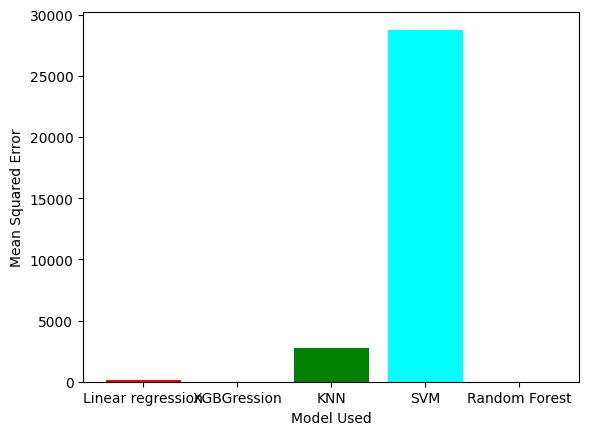

In [ ]:
plt.xlabel("Model Used")
plt.ylabel("Mean Squared Error")
model_NAMES = ["Linear regression" , "XGBGression" , "KNN" , "SVM" , "Random Forest"]
errors = [error1 , error2 , error3 , error4 , error5]
plt.bar(model_NAMES , errors , color=["red","orange","green" , "cyan" , "blue"])